## Feature Engineering

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
# Install a Korean font
!apt-get update -qq > /dev/null
!apt-get install fonts-nanum -qq > /dev/null

# Find the font path for NanumGothic
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for fpath in font_files:
    fm.fontManager.addfont(fpath)

# Set the font to NanumGothic
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False) # Allow negative signs to be displayed correctly

print("Korean font installed and configured.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Korean font installed and configured.


In [57]:
# 데이터 불러오기
A_in = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_in_final.csv')
A_out = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_final.csv')

print(A_in.columns, A_out.columns)

Index(['index', '일자', '작업유형', '매출처코드', '매출처 우편번호', '공급업체 코드', '공급업체 우편번호',
       '입고 형태', '상품코드', '바코드', '상품명', '규격', '옵션 코드', '옵션', '입수', '수량', 'EA',
       '판매금액', '부가세(과세)', '대분류', '중분류', '소분류', '매출처 우편번호_str', '지역대분류',
       '고객별_평균구매수량', '고객별_구매빈도', '대분류2', '중분류2', '소분류2', '연도', '월'],
      dtype='object') Index(['판매일', '구분', '매출처코드', '매출처 우편번호', '판매수량', '옵션코드', '규격', '입수', '바코드',
       '상품명', '대분류', '중분류', '소분류', '공급가액', '부가세'],
      dtype='object')


In [53]:
A_in['중분류2'].unique()

array([12,  6,  0,  2, 20, 13, 21, 22, 17, 18, 10,  9, 14, 11, 19, 15,  1,
        8,  7, 16,  4,  3,  5])

In [54]:
A_out['중분류'].unique()

array([15,  7,  6,  5,  1,  4, 11,  8, 12,  0,  3, 16, 13, 14, 18, 17,  9,
       21, 22, 19, 20, 10,  2])

### 데이터 탐색

In [25]:
A_out.head()

,판매일,구분,매출처코드,매출처 우편번호,판매수량,옵션코드,규격,입수,바코드,상품명,대분류,중분류,소분류,공급가액,부가세
0,2024-01-02,매출,98,37684,2,BX,20줄,1000,8.809242e+12,종이컵]고급형<이안>,3,15,14,18500,1850
1,2024-01-02,매출,8,37542,1,BX,24입,24,1.880113e+13,팔도]뽀로로밀크<235ml*24>,1,7,0,16900,1690
2,2024-01-02,매출,8,37542,2,BX,30입,30,1.880971e+13,과자]건빵<보성/70g>,1,6,0,17000,1700
3,2024-01-02,매출,8,37542,1,BX,12입,12,1.880122e+13,맥콜<1.5L>,1,7,0,17400,1740
4,2024-01-02,매출,8,37542,1,BX,10입,10,1.880107e+13,남양]프렌치카페컵(카페오레)<200ml>,1,7,0,10500,1050


In [4]:
check = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_2024.csv')

# '판매일' 컬럼을 datetime 타입으로 변환하고 인덱스로 설정
check['판매일'] = pd.to_datetime(check['판매일'])
check.set_index('판매일', inplace=True)

# 연도(Year), 월(Month) 컬럼 추가
check['연도'] = check.index.year
check['월'] = check.index.month

check.head()

/tmp/ipython-input-2687171839.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  check = pd.read_csv('/content/drive/MyDrive/유통경진대회/A_out_2024.csv')


,구분,매출처코드,우편번호,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류,공급가액,부가세,연도,월
판매일,,,,,,,,,,,,,,,,
2024-01-02,매출,98,37684,2,BX,20줄,1000,8.809242e+12,종이컵]고급형<이안>,비식품,잡화,"일회용제품(용기,젓가락등)",18500,1850,2024,1
2024-01-02,매출,8,37542,1,BX,24입,24,1.880113e+13,팔도]뽀로로밀크<235ml*24>,식품,"생수,음료,건강",NaN,16900,1690,2024,1
2024-01-02,매출,8,37542,2,BX,30입,30,1.880971e+13,과자]건빵<보성/70g>,식품,"과자,씨리얼,초코릿,빵류",NaN,17000,1700,2024,1
2024-01-02,매출,8,37542,1,BX,12입,12,1.880122e+13,맥콜<1.5L>,식품,"생수,음료,건강",NaN,17400,1740,2024,1
2024-01-02,매출,8,37542,1,BX,10입,10,1.880107e+13,남양]프렌치카페컵(카페오레)<200ml>,식품,"생수,음료,건강",NaN,10500,1050,2024,1


In [14]:
target_df = check[(check['중분류'] == '생수,음료,건강') | (check['중분류'] == '신선식품')].copy()
target_df['중분류'].value_counts()

,count
중분류,
"생수,음료,건강",28930
신선식품,6327


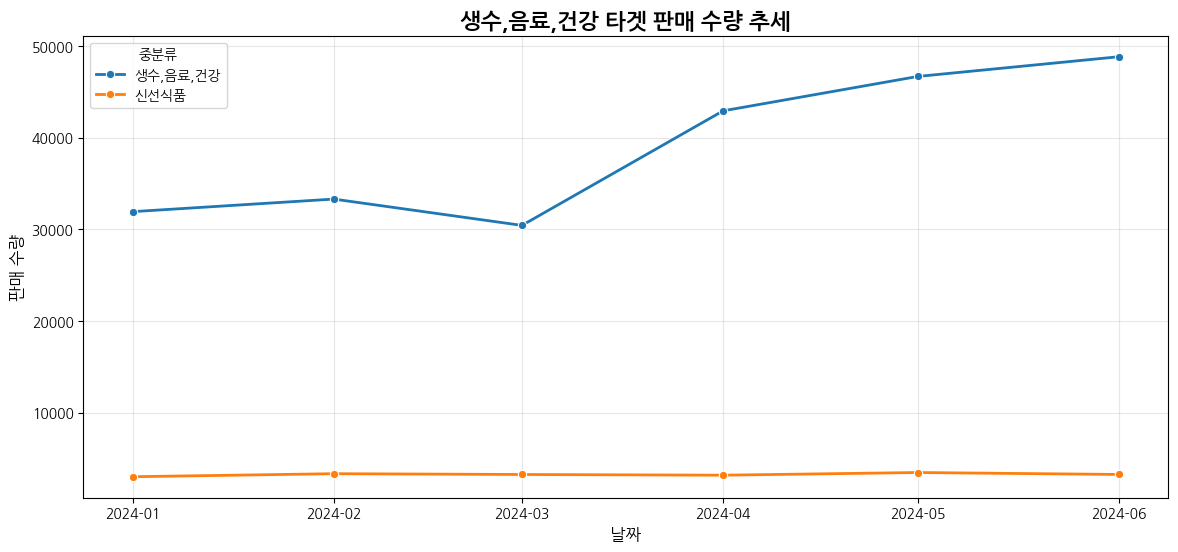

In [11]:
from itertools import product

# 1. 기본 집계
category_monthly_sales = target_df.groupby(['연도', '월', '중분류'])['판매수량'].sum().reset_index()

# 2. 모든 조합 생성
# Get unique combinations of 연도 and 월 from the original target_df
unique_combinations = target_df[['연도', '월', '중분류']].drop_duplicates()

# Create a DataFrame with all unique combinations
all_combinations = pd.DataFrame(
    list(product(
        target_df['연도'].unique(),
        target_df['월'].unique(),
        target_df['중분류'].unique()
    )),
    columns=['연도', '월', '중분류']
)

# 3. 병합 (누락된 조합은 0으로)
category_monthly_sales = all_combinations.merge(
    category_monthly_sales,
    on=['연도', '월', '중분류'],
    how='left'
).fillna(0)

# 4. 일자 생성 및 후속 처리
category_monthly_sales['일자'] = pd.to_datetime(
    category_monthly_sales['연도'].astype(str) + '-' +
    category_monthly_sales['월'].astype(str)
)
category_monthly_sales

# 그래프 그리기
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=category_monthly_sales,
    x='일자',
    y='판매수량',
    hue='중분류',
    marker='o',
    linewidth=2
)

plt.title('생수,음료,건강 타겟 판매 수량 추세', fontsize=16, fontweight='bold')
plt.xlabel('날짜', fontsize=12)
plt.ylabel('판매 수량', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

여전히 6월 이후의 데이터 소실 => 삭제 결정

In [16]:
target_df.reset_index(inplace=True)
target_df[target_df['판매일'] >= '2024-06-01']

,판매일,구분,매출처코드,우편번호,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류,공급가액,부가세,연도,월
28300,2024-06-03,매출,98,37684,1,BX,12입,12,1.880100e+13,블랙보리<1.5*12>,식품,"생수,음료,건강",NaN,16000,1600,2024,6
28301,2024-06-03,매출,2257,37518,2,BX,2L*6,6,8.808244e+12,삼다수2L,식품,"생수,음료,건강",NaN,11000,1100,2024,6
28302,2024-06-03,매출,2257,37518,1,BX,30입,30,1.880104e+13,동서]티오피<더블랙/200ml>,식품,"생수,음료,건강",NaN,20000,2000,2024,6
28303,2024-06-03,매출,2257,37518,1,BX,30입,30,1.880104e+13,동서]티오피<마스터라떼/200ml>,식품,"생수,음료,건강",NaN,20000,2000,2024,6
28304,2024-06-03,매출,2257,37518,1,BX,250ml*30,30,1.880122e+13,맥콜캔<250ml>,식품,"생수,음료,건강",NaN,13900,1390,2024,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35252,2024-06-28,매출,2067,37925,3,EA,1입,1,8.801066e+12,하회]하우스그릴부어스트<310g>,식품,신선식품,"냉동,냉장,간편식",10900,1090,2024,6
35253,2024-06-28,반품,2206,37633,1,EA,24입,1,8.801129e+12,팔도]뽀로로사과<235ml*24>,식품,"생수,음료,건강",NaN,-600,-60,2024,6
35254,2024-06-28,반품,2206,37633,2,EA,24입,1,8.801129e+12,팔도]뽀로로밀크<235ml*24>,식품,"생수,음료,건강",NaN,-1200,-120,2024,6
35255,2024-06-28,반품,2206,37633,14,EA,24입,1,8.809297e+12,팔도]뽀로로보리차<220ml*24>,식품,"생수,음료,건강",NaN,-8400,-840,2024,6


In [30]:
target_df_A_out = A_out[(A_out['중분류'] == 7) | (A_out['중분류'] == 1)].copy()
after_6 = target_df_A_out[target_df_A_out['판매일'] >= '2024-06-01']
after_6

,판매일,구분,매출처코드,매출처 우편번호,판매수량,옵션코드,규격,입수,바코드,상품명,대분류,중분류,소분류,공급가액,부가세
130286,2024-06-03,매출,98,37684,1,BX,12입,12,1.880100e+13,블랙보리<1.5*12>,1,7,0,16000,1600
130288,2024-06-03,매출,2257,37518,2,BX,2L*6,6,8.808244e+12,삼다수2L,1,7,0,11000,1100
130290,2024-06-03,매출,2257,37518,1,BX,30입,30,1.880104e+13,동서]티오피<더블랙/200ml>,1,7,0,20000,2000
130291,2024-06-03,매출,2257,37518,1,BX,30입,30,1.880104e+13,동서]티오피<마스터라떼/200ml>,1,7,0,20000,2000
130293,2024-06-03,매출,2257,37518,1,BX,250ml*30,30,1.880122e+13,맥콜캔<250ml>,1,7,0,13900,1390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155740,2024-06-28,매출,2213,38004,2,EA,8입,1,8.801007e+12,냉동]비비고<김치왕교자만두/420g*2>,1,1,21,11000,1100
155765,2024-06-28,매출,247,38889,150,EA,30입,1,8.801106e+12,해태]업소용<매실/175ml>,1,7,0,37900,3790
155766,2024-06-28,매출,2067,37925,1,EA,5입,1,1.701001e+12,얼음]칵테일,1,1,21,5200,520
155767,2024-06-28,매출,2067,37925,1,EA,15입,1,1.880974e+13,얼음]컵<185g*15>,1,1,21,5200,520


데이터가 2024년 6월 28일 이후로 존재하지 않음 => 학습시 참고

### 라이브러리 설치

In [31]:
pip install holidayskr

### 결측치 처리

In [58]:
def remove_missing_target_data(df, target_categories=[7, 1],
                                cutoff_date='2024-06-28', date_column=None,
                                category_mapping=None):
    """
    특정 날짜 이후 target 중분류 데이터가 없는 경우 해당 데이터 제거

    Parameters:
    -----------
    df : DataFrame
        원본 데이터프레임
    target_categories : list
        확인할 중분류 리스트 (숫자 인코딩 값 또는 문자열)
        예: [7, 1] 또는 ['생수,음료,건강', '신선식품']
    cutoff_date : str
        기준 날짜
    date_column : str, optional
        날짜 컬럼명 (None이면 자동 감지)
    category_mapping : dict, optional
        중분류 인코딩 매핑 (예: {7: '생수,음료,건강', 1: '신선식품'})

    Returns:
    --------
    DataFrame : 정제된 데이터프레임
    """

    print(f"[원본 데이터 크기] {df.shape}")
    print(f"[컬럼 목록]\n{df.columns.tolist()}")

    # 날짜 컬럼 자동 감지
    if date_column is None:
        date_candidates = ['판매일', '날짜', 'date', 'Date', '일자', '판매날짜']
        for col in date_candidates:
            if col in df.columns:
                date_column = col
                break

        if date_column is None:
            # 날짜 형식인 컬럼 찾기
            for col in df.columns:
                if df[col].dtype == 'object':
                    try:
                        pd.to_datetime(df[col].head())
                        date_column = col
                        break
                    except:
                        continue

    if date_column is None:
        raise ValueError("날짜 컬럼을 찾을 수 없습니다. date_column 파라미터를 명시해주세요.")

    print(f"\n[사용할 날짜 컬럼] {date_column}")

    # 날짜 컬럼 datetime 변환
    df[date_column] = pd.to_datetime(df[date_column])
    cutoff_date = pd.to_datetime(cutoff_date)

    # 중분류 컬럼 확인
    category_column = None
    category_candidates = ['중분류', '카테고리', 'category', 'Category']
    for col in category_candidates:
        if col in df.columns:
            category_column = col
            break

    if category_column is None:
        print("\n⚠️  중분류 컬럼을 찾을 수 없습니다. target_categories 필터링을 건너뜁니다.")
        # cutoff_date 이후 데이터만 제거
        after_cutoff = df[df[date_column] >= cutoff_date]
        print(f"\n[{cutoff_date.date()} 이후 데이터]")
        print(f"전체 데이터: {len(after_cutoff)}건")

        df_cleaned = df[df[date_column] < cutoff_date].copy()
        print(f"\n[적용] {cutoff_date.date()} 이후 데이터 전체 제거")
        print(f"정제 후 데이터 크기: {df_cleaned.shape}")

        return df_cleaned

    print(f"[사용할 중분류 컬럼] {category_column}")

    # 실제 중분류 값 확인 및 데이터 타입 체크
    print(f"\n[실제 데이터의 중분류 정보]")
    print(f"중분류 데이터 타입: {df[category_column].dtype}")
    unique_categories = df[category_column].unique()
    print(f"고유값 개수: {len(unique_categories)}")
    print(f"고유값 샘플 (최대 20개):")
    for cat in sorted(unique_categories)[:20]:
        count = (df[category_column] == cat).sum()
        if category_mapping and cat in category_mapping:
            print(f"  - {cat} ({category_mapping[cat]}): {count}건")
        else:
            print(f"  - {cat}: {count}건")
    if len(unique_categories) > 20:
        print(f"  ... 외 {len(unique_categories) - 20}개")

    # target_categories의 타입 확인
    print(f"\n[찾으려는 target_categories]")
    print(f"타입: {type(target_categories[0]) if len(target_categories) > 0 else 'empty'}")
    print(f"값: {target_categories}")

    # target_categories와 실제 값 비교
    for target in target_categories:
        exists = target in unique_categories
        count = (df[category_column] == target).sum() if exists else 0
        status = f'존재 ✓ ({count}건)' if exists else '존재하지 않음 ✗'

        if category_mapping and target in category_mapping:
            print(f"  - {target} ({category_mapping[target]}): {status}")
        else:
            print(f"  - {target}: {status}")

    # cutoff_date 이후 target 중분류 데이터 확인
    after_cutoff = df[df[date_column] >= cutoff_date]
    target_after_cutoff = after_cutoff[after_cutoff[category_column].isin(target_categories)]

    print(f"\n[{cutoff_date.date()} 이후 데이터]")
    print(f"전체 데이터: {len(after_cutoff)}건")
    print(f"Target 중분류 데이터: {len(target_after_cutoff)}건")

    # Option 1: cutoff_date 이후 전체 데이터 제거 (추천)
    # df_cleaned = df[df[date_column] < cutoff_date].copy()
    # print(f"\n[Option 1 적용] {cutoff_date.date()} 이후 데이터 전체 제거")
    # print(f"정제 후 데이터 크기: {df_cleaned.shape}")

    # Option 2: target 중분류만 해당 기간 제거하고 다른 중분류는 유지
    df_cleaned = df[~((df[date_column] >= cutoff_date) &
                      (df[category_column].isin(target_categories)))].copy()

    # 날짜별 중분류별 데이터 개수 확인
    print("\n[날짜별 Target 중분류 데이터 개수 (2024년 5-7월)]")
    date_check = df[(df[date_column] >= '2024-05-01') &
                    (df[date_column] <= '2024-07-31')]

    print(f"5-7월 전체 데이터: {len(date_check)}건")

    if len(date_check) > 0:
        print(f"\n5-7월의 중분류 분포:")
        category_dist = date_check[category_column].value_counts()
        print(category_dist.head(10))

    for category in target_categories:
        # 정확한 매칭
        cat_data = date_check[date_check[category_column] == category]

        category_name = category_mapping.get(category, category) if category_mapping else category

        print(f"\n{category} ({category_name}):")
        print(f"  데이터 건수: {len(cat_data)}건")

        if len(cat_data) > 0:
            daily_count = cat_data.groupby(date_column).size()
            print(f"  일별 데이터 (최근 20일):")
            print(daily_count.tail(20))
        else:
            print("  데이터 없음 - 중분류 값을 확인하세요!")

    return df_cleaned

In [59]:
df_cleaned = remove_missing_target_data(A_out)

[원본 데이터 크기] (1805438, 15)
[컬럼 목록]
['판매일', '구분', '매출처코드', '매출처 우편번호', '판매수량', '옵션코드', '규격', '입수', '바코드', '상품명', '대분류', '중분류', '소분류', '공급가액', '부가세']

[사용할 날짜 컬럼] 판매일
[사용할 중분류 컬럼] 중분류

[실제 데이터의 중분류 정보]
중분류 데이터 타입: int64
고유값 개수: 23
고유값 샘플 (최대 20개):
  - 0: 224924건
  - 1: 32795건
  - 2: 2032건
  - 3: 8943건
  - 4: 140923건
  - 5: 233398건
  - 6: 183405건
  - 7: 222939건
  - 8: 63915건
  - 9: 719건
  - 10: 415536건
  - 11: 14680건
  - 12: 36049건
  - 13: 15514건
  - 14: 5506건
  - 15: 183769건
  - 16: 15592건
  - 17: 1987건
  - 18: 134건
  - 19: 51건
  ... 외 3개

[찾으려는 target_categories]
타입: <class 'int'>
값: [7, 1]
  - 7: 존재 ✓ (222939건)
  - 1: 존재 ✓ (32795건)

[2024-06-28 이후 데이터]
전체 데이터: 217944건
Target 중분류 데이터: 376건

[날짜별 Target 중분류 데이터 개수 (2024년 5-7월)]
5-7월 전체 데이터: 92241건

5-7월의 중분류 분포:
중분류
0     39028
7     11456
5     10210
6      7975
15     7248
4      6205
8      2704
1      2255
12     1926
13      814
Name: count, dtype: int64

7 (7):
  데이터 건수: 11456건
  일별 데이터 (최근 20일):
판매일
2024-05-31    241
2024-06-03    

In [60]:
df_cleaned['중분류'].unique()

array([15,  7,  6,  5,  1,  4, 11,  8, 12,  0,  3, 16, 13, 14, 18, 17,  9,
       21, 22, 19, 20, 10,  2])

### 공휴일

In [64]:
from holidayskr import is_holiday, year_holidays


def create_holiday_features(df, date_column=None):
    """
    holidayskr 라이브러리를 사용한 공휴일 Feature Engineering

    Parameters:
    -----------
    df : DataFrame
        원본 데이터프레임
    date_column : str, optional
        날짜 컬럼명 (None이면 자동 감지)

    Returns:
    --------
    DataFrame : 공휴일 feature가 추가된 데이터프레임
    """

    df = df.copy()

    # 날짜 컬럼 자동 감지
    if date_column is None:
        date_candidates = ['판매일', '날짜', 'date', 'Date', '일자', '판매날짜']
        for col in date_candidates:
            if col in df.columns:
                date_column = col
                break

        if date_column is None:
            for col in df.columns:
                if df[col].dtype == 'object' or 'date' in str(df[col].dtype).lower():
                    try:
                        pd.to_datetime(df[col].head())
                        date_column = col
                        break
                    except:
                        continue

    if date_column is None:
        raise ValueError("날짜 컬럼을 찾을 수 없습니다. date_column 파라미터를 명시해주세요.")

    print("\n" + "="*60)
    print("holidayskr를 사용한 공휴일 Feature 생성")
    print("="*60)
    print(f"[사용할 날짜 컬럼] {date_column}")

    df[date_column] = pd.to_datetime(df[date_column])

    # 날짜 범위 확인
    min_date = df[date_column].min()
    max_date = df[date_column].max()
    print(f"데이터 기간: {min_date.date()} ~ {max_date.date()}")

    # holidayskr로 전체 공휴일 정보 가져오기
    # 필요한 연도 목록 생성
    years = list(range(min_date.year, max_date.year + 1))

    print(f"\n공휴일 정보 수집 중... (연도: {years})")

    # 연도별 공휴일 수집
    all_holidays = {}
    for year in years:
        year_hols = year_holidays(str(year))
        for holiday_date, holiday_name in year_hols:
            all_holidays[holiday_date] = holiday_name

    # 공휴일 DataFrame 생성
    holiday_df = pd.DataFrame([
        {'date': date, 'holiday_name': name}
        for date, name in all_holidays.items()
    ])

    if len(holiday_df) > 0:
        holiday_df['date'] = pd.to_datetime(holiday_df['date'])
        holiday_df['is_holiday'] = 1
        print(f"\n총 {len(holiday_df)}개의 공휴일 발견")
        print("\n[공휴일 목록 샘플 (최근 15개)]")
        print(holiday_df.sort_values('date').tail(15).to_string(index=False))
    else:
        holiday_df = pd.DataFrame(columns=['date', 'is_holiday', 'holiday_name'])
        print("\n공휴일 정보를 찾을 수 없습니다.")

    # 원본 데이터에 날짜만 추출한 컬럼 생성 (merge용)
    df['date_only'] = df[date_column].dt.date
    holiday_df['date_only'] = holiday_df['date'].dt.date

    # 1. 기본 공휴일 여부 및 이름 merge
    df = df.merge(
        holiday_df[['date_only', 'is_holiday', 'holiday_name']],
        on='date_only',
        how='left'
    )
    df['is_holiday'] = df['is_holiday'].fillna(0).astype(int)
    df['holiday_name'] = df['holiday_name'].fillna('')

    # 공휴일 날짜 set 생성 (빠른 조회를 위해)
    holiday_dates_set = set(holiday_df['date_only'].tolist())

    # 2. 연휴 구간 판단 (전날 또는 다음날이 공휴일)
    def check_long_holiday(date):
        date_obj = date.date() if isinstance(date, pd.Timestamp) else date
        prev_date = date_obj - timedelta(days=1)
        next_date = date_obj + timedelta(days=1)

        if date_obj in holiday_dates_set:
            if prev_date in holiday_dates_set or next_date in holiday_dates_set:
                return 1
        return 0

    df['is_long_holiday'] = df[date_column].apply(check_long_holiday)

    # 3. 공휴일까지 남은 일수 (향후 7일 이내)
    def days_to_next_holiday(date):
        date_obj = date.date() if isinstance(date, pd.Timestamp) else date
        for i in range(1, 8):  # 7일 이내
            future_date = date_obj + timedelta(days=i)
            if future_date in holiday_dates_set:
                return i
        return 0

    df['days_to_holiday'] = df[date_column].apply(days_to_next_holiday)

    # 4. 공휴일 이후 경과 일수 (과거 7일 이내)
    def days_from_past_holiday(date):
        date_obj = date.date() if isinstance(date, pd.Timestamp) else date
        for i in range(1, 8):  # 7일 이내
            past_date = date_obj - timedelta(days=i)
            if past_date in holiday_dates_set:
                return i
        return 0

    df['days_from_holiday'] = df[date_column].apply(days_from_past_holiday)

    # 5. 공휴일 전날 (장보기 수요 증가)
    df['is_day_before_holiday'] = (df['days_to_holiday'] == 1).astype(int)

    # 6. 공휴일 다음날
    df['is_day_after_holiday'] = (df['days_from_holiday'] == 1).astype(int)

    # 7. 주요 공휴일 개별 인코딩
    df['is_lunar_new_year'] = df['holiday_name'].str.contains(
        '설날|구정', case=False, na=False, regex=True
    ).astype(int)

    df['is_chuseok'] = df['holiday_name'].str.contains(
        '추석', case=False, na=False
    ).astype(int)

    df['is_independence_day'] = df['holiday_name'].str.contains(
        '광복절|삼일절|개천절|한글날', case=False, na=False, regex=True
    ).astype(int)

    df['is_childrens_day'] = df['holiday_name'].str.contains(
        '어린이날', case=False, na=False
    ).astype(int)

    df['is_memorial_day'] = df['holiday_name'].str.contains(
        '현충일', case=False, na=False
    ).astype(int)

    df['is_national_foundation_day'] = df['holiday_name'].str.contains(
        '개천절', case=False, na=False
    ).astype(int)

    # 8. 여름 휴가 시즌 (7-8월, 공휴일 아니지만 계절 효과)
    df['is_summer_vacation'] = (
        df[date_column].dt.month.isin([7, 8])
    ).astype(int)

    # 9. 연말연시 시즌 (12월 말 ~ 1월 초)
    df['is_year_end_season'] = (
        ((df[date_column].dt.month == 12) & (df[date_column].dt.day >= 20)) |
        ((df[date_column].dt.month == 1) & (df[date_column].dt.day <= 7))
    ).astype(int)

    # date_only 컬럼 제거 (임시 컬럼)
    df = df.drop('date_only', axis=1)

    print("\n[생성된 공휴일 Feature 목록]")
    holiday_features = [
        'is_holiday', 'holiday_name', 'is_long_holiday',
        'days_to_holiday', 'days_from_holiday',
        'is_day_before_holiday', 'is_day_after_holiday',
        'is_lunar_new_year', 'is_chuseok', 'is_independence_day',
        'is_childrens_day', 'is_memorial_day', 'is_national_foundation_day',
        'is_summer_vacation', 'is_year_end_season'
    ]

    for i, feat in enumerate(holiday_features, 1):
        if feat in df.columns:
            print(f"  {i:2d}. {feat}")

    # 공휴일 통계
    print(f"\n[공휴일 통계]")
    print(f"총 공휴일 일수: {df['is_holiday'].sum()}")
    print(f"공휴일 전날: {df['is_day_before_holiday'].sum()}")
    print(f"연휴 기간: {df['is_long_holiday'].sum()}")
    print(f"설날 연휴: {df['is_lunar_new_year'].sum()}")
    print(f"추석 연휴: {df['is_chuseok'].sum()}")

    return df



In [65]:
df_with_holidays = create_holiday_features(df_cleaned)


holidayskr를 사용한 공휴일 Feature 생성
[사용할 날짜 컬럼] 판매일
데이터 기간: 2021-01-04 ~ 2024-12-31

공휴일 정보 수집 중... (연도: [2021, 2022, 2023, 2024])

총 67개의 공휴일 발견

[공휴일 목록 샘플 (최근 15개)]
      date  holiday_name  is_holiday
2024-02-12    대체 공휴일(설날)           1
2024-03-01          3·1절           1
2024-04-10 제22대 국회의원 선거일           1
2024-05-01        근로자의 날           1
2024-05-05          어린이날           1
2024-05-06  대체 공휴일(어린이날)           1
2024-05-15         석가탄신일           1
2024-06-06           현충일           1
2024-08-15           광복절           1
2024-09-16         추석 전날           1
2024-09-17            추석           1
2024-09-18        추석 다음날           1
2024-10-03           개천절           1
2024-10-09           한글날           1
2024-12-25         크리스마스           1

[생성된 공휴일 Feature 목록]
   1. is_holiday
   2. holiday_name
   3. is_long_holiday
   4. days_to_holiday
   5. days_from_holiday
   6. is_day_before_holiday
   7. is_day_after_holiday
   8. is_lunar_new_year
   9. is_chuseok
  10. is_independence_

In [66]:
df_with_holidays.head()

,판매일,구분,매출처코드,매출처 우편번호,판매수량,옵션코드,규격,입수,바코드,상품명,...,is_day_before_holiday,is_day_after_holiday,is_lunar_new_year,is_chuseok,is_independence_day,is_childrens_day,is_memorial_day,is_national_foundation_day,is_summer_vacation,is_year_end_season
0,2024-01-02,매출,98,37684,2,BX,20줄,1000,8.809242e+12,종이컵]고급형<이안>,...,0,1,0,0,0,0,0,0,0,1
1,2024-01-02,매출,8,37542,1,BX,24입,24,1.880113e+13,팔도]뽀로로밀크<235ml*24>,...,0,1,0,0,0,0,0,0,0,1
2,2024-01-02,매출,8,37542,2,BX,30입,30,1.880971e+13,과자]건빵<보성/70g>,...,0,1,0,0,0,0,0,0,0,1
3,2024-01-02,매출,8,37542,1,BX,12입,12,1.880122e+13,맥콜<1.5L>,...,0,1,0,0,0,0,0,0,0,1
4,2024-01-02,매출,8,37542,1,BX,10입,10,1.880107e+13,남양]프렌치카페컵(카페오레)<200ml>,...,0,1,0,0,0,0,0,0,0,1


### 공휴일 전후 판매 패턴 분석

In [67]:
def analyze_holiday_patterns(df, target_column='판매수량',
                            category_column=None,
                            target_categories=[7, 1],
                            category_mapping=None,
                            date_column=None):
    """
    공휴일 전후 판매 패턴 분석 및 이상치 탐지

    Parameters:
    -----------
    df : DataFrame
        공휴일 feature가 추가된 데이터프레임
    target_column : str
        분석할 타겟 컬럼
    category_column : str, optional
        중분류 컬럼명 (None이면 자동 감지)
    target_categories : list
        분석할 중분류 리스트 (숫자 인코딩 값 또는 문자열)
        예: [7, 1]
    category_mapping : dict, optional
        중분류 인코딩 매핑 (예: {7: '생수,음료,건강', 1: '신선식품'})
    date_column : str, optional
        날짜 컬럼명 (None이면 자동 감지)

    Returns:
    --------
    DataFrame : 이상치 플래그가 추가된 데이터프레임
    """

    df = df.copy()

    # 중분류 컬럼 자동 감지
    if category_column is None:
        category_candidates = ['중분류', '카테고리', 'category', 'Category']
        for col in category_candidates:
            if col in df.columns:
                category_column = col
                break

    if category_column is None:
        print("\n⚠️  중분류 컬럼을 찾을 수 없습니다. 전체 데이터로 분석합니다.")
        target_categories = ['전체']
        df['전체'] = '전체'
        category_column = '전체'

    # 타겟 컬럼 확인
    if target_column not in df.columns:
        target_candidates = ['판매수량', '수량', 'quantity', 'sales']
        for col in target_candidates:
            if col in df.columns:
                target_column = col
                break

    if target_column not in df.columns:
        raise ValueError(f"타겟 컬럼 '{target_column}'을 찾을 수 없습니다.")

    print("\n" + "="*60)
    print("공휴일 전후 판매 패턴 분석")
    print("="*60)
    print(f"[분석 컬럼] 타겟: {target_column}, 카테고리: {category_column}")

    for category in target_categories:
        cat_data = df[df[category_column] == category].copy()

        category_name = category_mapping.get(category, category) if category_mapping else category

        print(f"\n[{category} - {category_name}]")

        # 평일 vs 공휴일 판매량 비교
        weekday_sales = cat_data[cat_data['is_holiday'] == 0][target_column]
        holiday_sales = cat_data[cat_data['is_holiday'] == 1][target_column]

        if len(holiday_sales) > 0:
            print(f"평일 평균 판매량: {weekday_sales.mean():.0f} (±{weekday_sales.std():.0f})")
            print(f"공휴일 평균 판매량: {holiday_sales.mean():.0f} (±{holiday_sales.std():.0f})")
            change_rate = ((holiday_sales.mean() / weekday_sales.mean() - 1) * 100)
            print(f"증감률: {change_rate:+.1f}%")
        else:
            print("공휴일 데이터가 없습니다.")

        # 공휴일 전날 vs 공휴일 다음날
        before_holiday = cat_data[cat_data['is_day_before_holiday'] == 1][target_column]
        after_holiday = cat_data[cat_data['is_day_after_holiday'] == 1][target_column]

        if len(before_holiday) > 0:
            print(f"공휴일 전날 평균: {before_holiday.mean():.0f} (전체 대비 {before_holiday.mean() / weekday_sales.mean() * 100:.1f}%)")
        if len(after_holiday) > 0:
            print(f"공휴일 다음날 평균: {after_holiday.mean():.0f} (전체 대비 {after_holiday.mean() / weekday_sales.mean() * 100:.1f}%)")

        # 이상치 판단: IQR 방법 (공휴일 기간 별도 적용)
        # 평일 이상치 기준
        Q1_weekday = weekday_sales.quantile(0.25)
        Q3_weekday = weekday_sales.quantile(0.75)
        IQR_weekday = Q3_weekday - Q1_weekday

        lower_bound_weekday = Q1_weekday - 1.5 * IQR_weekday
        upper_bound_weekday = Q3_weekday + 1.5 * IQR_weekday

        # 공휴일 이상치 기준 (더 넓은 범위 허용)
        if len(holiday_sales) > 0:
            Q1_holiday = holiday_sales.quantile(0.25)
            Q3_holiday = holiday_sales.quantile(0.75)
            IQR_holiday = Q3_holiday - Q1_holiday

            lower_bound_holiday = Q1_holiday - 2.0 * IQR_holiday  # 평일보다 넓게
            upper_bound_holiday = Q3_holiday + 2.0 * IQR_holiday
        else:
            lower_bound_holiday = lower_bound_weekday
            upper_bound_holiday = upper_bound_weekday

        # 이상치 플래그 생성
        cat_indices = cat_data.index
        df.loc[cat_indices, f'{category}_outlier'] = 0

        # 평일 이상치
        weekday_outliers = cat_data[
            (cat_data['is_holiday'] == 0) &
            ((cat_data[target_column] < lower_bound_weekday) |
             (cat_data[target_column] > upper_bound_weekday))
        ]
        df.loc[weekday_outliers.index, f'{category}_outlier'] = 1

        # 공휴일 이상치
        holiday_outliers = cat_data[
            (cat_data['is_holiday'] == 1) &
            ((cat_data[target_column] < lower_bound_holiday) |
             (cat_data[target_column] > upper_bound_holiday))
        ]
        df.loc[holiday_outliers.index, f'{category}_outlier'] = 1

        total_outliers = (df[f'{category}_outlier'] == 1).sum()
        print(f"\n이상치 개수: {total_outliers}건 ({total_outliers / len(cat_data) * 100:.2f}%)")
        print(f"  - 평일 기준: [{lower_bound_weekday:.0f}, {upper_bound_weekday:.0f}]")
        print(f"  - 공휴일 기준: [{lower_bound_holiday:.0f}, {upper_bound_holiday:.0f}]")

        # 주요 공휴일별 판매 패턴
        print(f"\n주요 공휴일별 평균 판매량:")
        holiday_types = [
            ('is_lunar_new_year', '설날'),
            ('is_chuseok', '추석'),
            ('is_childrens_day', '어린이날'),
            ('is_independence_day', '국경일')
        ]

        for holiday_col, holiday_name in holiday_types:
            if holiday_col in cat_data.columns:
                holiday_data = cat_data[cat_data[holiday_col] == 1]
                if len(holiday_data) > 0:
                    avg_sales = holiday_data[target_column].mean()
                    vs_weekday = (avg_sales / weekday_sales.mean() - 1) * 100
                    print(f"  - {holiday_name}: {avg_sales:.0f} ({vs_weekday:+.1f}%)")

    return df

In [72]:
category_mapping = {
    'missing': 0,
    '신선식품': 1,
    '과일,채소': 2,
    '축산,수산,건해산': 3,
    '가공식품류': 4,
    '라면,통조림,상온즉석': 5,
    '과자,씨리얼,초코릿,빵류': 6,
    '생수,음료,건강': 7,
    '커피,차류': 8,
    '유제품,아이스크림등': 9,
    '주류': 10,
    '화장지류': 11,
    '세제류': 12,
    '헤어,바디,구강': 13,
    '방향제류': 14,
    '잡화': 15,
    '양곡': 16,
    '반려동물용품': 17,
    '기타(식품)': 18,
    '기타(비식품)': 19,
    '기타': 20,
    '명절세트(식품)': 21,
    '명절세트(비식품)': 22
}

reverse_category_mapping = {v: k for k, v in category_mapping.items()}


In [73]:
df_final = analyze_holiday_patterns(
    df_with_holidays,
    target_categories=[7, 1],
    category_mapping=reverse_category_mapping
)


공휴일 전후 판매 패턴 분석
[분석 컬럼] 타겟: 판매수량, 카테고리: 중분류

[7 - 생수,음료,건강]
평일 평균 판매량: 8 (±23)
공휴일 평균 판매량: 8 (±25)
증감률: -1.6%
공휴일 전날 평균: 9 (전체 대비 106.0%)
공휴일 다음날 평균: 8 (전체 대비 102.7%)

이상치 개수: 32054건 (14.40%)
  - 평일 기준: [-6, 14]
  - 공휴일 기준: [-9, 16]

주요 공휴일별 평균 판매량:
  - 설날: 9 (+10.2%)
  - 추석: 9 (+11.5%)
  - 어린이날: 7 (-8.3%)

[1 - 신선식품]
평일 평균 판매량: 3 (±4)
공휴일 평균 판매량: 3 (±2)
증감률: -4.8%
공휴일 전날 평균: 3 (전체 대비 99.8%)
공휴일 다음날 평균: 3 (전체 대비 103.7%)

이상치 개수: 1411건 (4.31%)
  - 평일 기준: [-2, 6]
  - 공휴일 기준: [-3, 7]

주요 공휴일별 평균 판매량:
  - 설날: 3 (-3.6%)
  - 추석: 3 (+11.4%)
  - 어린이날: 2 (-25.1%)


추석, 설날 <=> 어린이날 : 서로 다른 양상을 보임 => 해석에 써먹자

### 요일 인코딩

In [76]:
df_final.head()

,판매일,구분,매출처코드,매출처 우편번호,판매수량,옵션코드,규격,입수,바코드,상품명,...,is_lunar_new_year,is_chuseok,is_independence_day,is_childrens_day,is_memorial_day,is_national_foundation_day,is_summer_vacation,is_year_end_season,7_outlier,1_outlier
0,2024-01-02,매출,98,37684,2,BX,20줄,1000,8.809242e+12,종이컵]고급형<이안>,...,0,0,0,0,0,0,0,1,NaN,NaN
1,2024-01-02,매출,8,37542,1,BX,24입,24,1.880113e+13,팔도]뽀로로밀크<235ml*24>,...,0,0,0,0,0,0,0,1,0.0,NaN
2,2024-01-02,매출,8,37542,2,BX,30입,30,1.880971e+13,과자]건빵<보성/70g>,...,0,0,0,0,0,0,0,1,NaN,NaN
3,2024-01-02,매출,8,37542,1,BX,12입,12,1.880122e+13,맥콜<1.5L>,...,0,0,0,0,0,0,0,1,0.0,NaN
4,2024-01-02,매출,8,37542,1,BX,10입,10,1.880107e+13,남양]프렌치카페컵(카페오레)<200ml>,...,0,0,0,0,0,0,0,1,0.0,NaN


In [78]:
df_final['일자'] = pd.to_datetime(df_final['판매일'])
df_final.head()

,판매일,구분,매출처코드,매출처 우편번호,판매수량,옵션코드,규격,입수,바코드,상품명,...,is_chuseok,is_independence_day,is_childrens_day,is_memorial_day,is_national_foundation_day,is_summer_vacation,is_year_end_season,7_outlier,1_outlier,일자
0,2024-01-02,매출,98,37684,2,BX,20줄,1000,8.809242e+12,종이컵]고급형<이안>,...,0,0,0,0,0,0,1,NaN,NaN,2024-01-02
1,2024-01-02,매출,8,37542,1,BX,24입,24,1.880113e+13,팔도]뽀로로밀크<235ml*24>,...,0,0,0,0,0,0,1,0.0,NaN,2024-01-02
2,2024-01-02,매출,8,37542,2,BX,30입,30,1.880971e+13,과자]건빵<보성/70g>,...,0,0,0,0,0,0,1,NaN,NaN,2024-01-02
3,2024-01-02,매출,8,37542,1,BX,12입,12,1.880122e+13,맥콜<1.5L>,...,0,0,0,0,0,0,1,0.0,NaN,2024-01-02
4,2024-01-02,매출,8,37542,1,BX,10입,10,1.880107e+13,남양]프렌치카페컵(카페오레)<200ml>,...,0,0,0,0,0,0,1,0.0,NaN,2024-01-02


In [82]:
df_final['요일'] = df_final['일자'].dt.dayofweek

display(df_final)
df_final['요일'].unique()

,판매일,구분,매출처코드,매출처 우편번호,판매수량,옵션코드,규격,입수,바코드,상품명,...,is_childrens_day,is_memorial_day,is_national_foundation_day,is_summer_vacation,is_year_end_season,7_outlier,1_outlier,일자,요일_인코딩,요일
0,2024-01-02,매출,98,37684,2,BX,20줄,1000,8.809242e+12,종이컵]고급형<이안>,...,0,0,0,0,1,NaN,NaN,2024-01-02,1,1
1,2024-01-02,매출,8,37542,1,BX,24입,24,1.880113e+13,팔도]뽀로로밀크<235ml*24>,...,0,0,0,0,1,0.0,NaN,2024-01-02,1,1
2,2024-01-02,매출,8,37542,2,BX,30입,30,1.880971e+13,과자]건빵<보성/70g>,...,0,0,0,0,1,NaN,NaN,2024-01-02,1,1
3,2024-01-02,매출,8,37542,1,BX,12입,12,1.880122e+13,맥콜<1.5L>,...,0,0,0,0,1,0.0,NaN,2024-01-02,1,1
4,2024-01-02,매출,8,37542,1,BX,10입,10,1.880107e+13,남양]프렌치카페컵(카페오레)<200ml>,...,0,0,0,0,1,0.0,NaN,2024-01-02,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805057,2023-02-14,매출,113,38178,2,BX,24입,24,8.801049e+12,참이슬6입,...,0,0,0,0,0,NaN,NaN,2023-02-14,1,1
1805058,2023-02-14,매출,113,38178,5,EA,6입,1,8.801052e+12,청정원]순창<초고추장/2.05kg>,...,0,0,0,0,0,NaN,NaN,2023-02-14,1,1
1805059,2023-02-14,매출,113,38178,30,EA,30입,1,8.801056e+12,칠성사이다<190ml/업소/캔>반품불가,...,0,0,0,0,0,1.0,NaN,2023-02-14,1,1
1805060,2023-02-14,매출,113,38178,6,BX,12입,12,8.801080e+12,막걸리<경주>,...,0,0,0,0,0,NaN,NaN,2023-02-14,1,1


array([1, 2, 3, 4, 0, 6, 5], dtype=int32)

In [125]:
df_final.drop(columns='요일_인코딩', inplace=True)

### 날씨

In [99]:
temp = pd.read_csv('/content/drive/MyDrive/유통경진대회/ta_20251009170604.csv', encoding='cp949')
temp.shape

(1462, 5)

In [100]:
temp['날짜'] = temp['날짜'].replace('\t', '', regex=True) # regex=True 추가하여 \t 패턴 일치
print(temp.head(), temp.shape)

           날짜  지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
0  2021-01-01  전국     -3.4     -9.3      1.6
1  2021-01-02  전국     -2.8     -6.9      1.4
2  2021-01-03  전국     -3.3     -7.7      1.1
3  2021-01-04  전국     -2.0     -8.1      3.9
4  2021-01-05  전국     -2.2     -7.4      1.9 (1462, 5)


In [112]:
temp.isna().value_counts()

날짜     지점     평균기온(℃)  최저기온(℃)  최고기온(℃)
False  False  False    False    False      1461
       True   True     True     True          1
Name: count, dtype: int64

In [116]:
# 보간법으로 처리: 전과 후의 평균
temp.drop(columns='지점', inplace=True)
temp.interpolate(method='linear', inplace=True)
temp.isna().value_counts()

/tmp/ipython-input-2545103573.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp.interpolate(method='linear', inplace=True)


,,,,count
날짜,평균기온(℃),최저기온(℃),최고기온(℃),
False,False,False,False,1462


In [123]:
df_final.drop(columns='일자', inplace=True)
df_final.head()

,판매일,구분,매출처코드,매출처 우편번호,판매수량,옵션코드,규격,입수,바코드,상품명,...,is_independence_day,is_childrens_day,is_memorial_day,is_national_foundation_day,is_summer_vacation,is_year_end_season,7_outlier,1_outlier,요일_인코딩,요일
0,2024-01-02,매출,98,37684,2,BX,20줄,1000,8.809242e+12,종이컵]고급형<이안>,...,0,0,0,0,0,1,NaN,NaN,1,1
1,2024-01-02,매출,8,37542,1,BX,24입,24,1.880113e+13,팔도]뽀로로밀크<235ml*24>,...,0,0,0,0,0,1,0.0,NaN,1,1
2,2024-01-02,매출,8,37542,2,BX,30입,30,1.880971e+13,과자]건빵<보성/70g>,...,0,0,0,0,0,1,NaN,NaN,1,1
3,2024-01-02,매출,8,37542,1,BX,12입,12,1.880122e+13,맥콜<1.5L>,...,0,0,0,0,0,1,0.0,NaN,1,1
4,2024-01-02,매출,8,37542,1,BX,10입,10,1.880107e+13,남양]프렌치카페컵(카페오레)<200ml>,...,0,0,0,0,0,1,0.0,NaN,1,1


In [120]:
temp.dtypes

,0
날짜,object
평균기온(℃),float64
최저기온(℃),float64
최고기온(℃),float64


In [127]:
# 1. ✨️ 날씨 데이터의 '날짜' 컬럼을 datetime 타입으로 변환 (타입 통일)
temp['날짜'] = pd.to_datetime(temp['날짜'])


# 2. ✨️ pd.merge()를 사용하여 두 데이터프레임을 합칩니다.
#    왼쪽(df_final)은 '판매일'을, 오른쪽(temp)은 '날짜'를 기준으로 합칩니다.
df_temp = pd.merge(
    df_final,
    temp,
    left_on='판매일',
    right_on='날짜',
    how='left'  # 'left'를 기준으로 하여 모든 판매 데이터를 유지
)


# 3. (선택사항) 합친 후에는 '날짜' 컬럼이 중복되므로 하나를 삭제해줍니다.
df_temp.drop('날짜', axis=1, inplace=True)
df_temp

,판매일,구분,매출처코드,매출처 우편번호,판매수량,옵션코드,규격,입수,바코드,상품명,...,is_memorial_day,is_national_foundation_day,is_summer_vacation,is_year_end_season,7_outlier,1_outlier,요일,평균기온(℃),최저기온(℃),최고기온(℃)
0,2024-01-02,매출,98,37684,2,BX,20줄,1000,8.809242e+12,종이컵]고급형<이안>,...,0,0,0,1,NaN,NaN,1,4.2,1.4,7.4
1,2024-01-02,매출,8,37542,1,BX,24입,24,1.880113e+13,팔도]뽀로로밀크<235ml*24>,...,0,0,0,1,0.0,NaN,1,4.2,1.4,7.4
2,2024-01-02,매출,8,37542,2,BX,30입,30,1.880971e+13,과자]건빵<보성/70g>,...,0,0,0,1,NaN,NaN,1,4.2,1.4,7.4
3,2024-01-02,매출,8,37542,1,BX,12입,12,1.880122e+13,맥콜<1.5L>,...,0,0,0,1,0.0,NaN,1,4.2,1.4,7.4
4,2024-01-02,매출,8,37542,1,BX,10입,10,1.880107e+13,남양]프렌치카페컵(카페오레)<200ml>,...,0,0,0,1,0.0,NaN,1,4.2,1.4,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805057,2023-02-14,매출,113,38178,2,BX,24입,24,8.801049e+12,참이슬6입,...,0,0,0,0,NaN,NaN,1,2.4,-1.3,7.2
1805058,2023-02-14,매출,113,38178,5,EA,6입,1,8.801052e+12,청정원]순창<초고추장/2.05kg>,...,0,0,0,0,NaN,NaN,1,2.4,-1.3,7.2
1805059,2023-02-14,매출,113,38178,30,EA,30입,1,8.801056e+12,칠성사이다<190ml/업소/캔>반품불가,...,0,0,0,0,1.0,NaN,1,2.4,-1.3,7.2
1805060,2023-02-14,매출,113,38178,6,BX,12입,12,8.801080e+12,막걸리<경주>,...,0,0,0,0,NaN,NaN,1,2.4,-1.3,7.2


### 경제지표

In [128]:
macro = pd.read_csv('/content/drive/MyDrive/유통경진대회/macro_data.csv')
macro

,Unnamed: 0,NAME,VALUE,YEAR,MONTH
0,0,GDP,537.7748,2021,1
1,1,GDP,537.7748,2021,2
2,2,GDP,537.7748,2021,3
3,3,GDP,550.8862,2021,4
4,4,GDP,550.8862,2021,5
...,...,...,...,...,...
1089,1089,평균소비성향,67.9000,2024,8
1090,1090,평균소비성향,67.9000,2024,9
1091,1091,평균소비성향,68.1000,2024,10
1092,1092,평균소비성향,68.1000,2024,11


In [1]:
macro.drop(columns = 'Unnamed: 0', inplace=True)
macro

NameError: name 'macro' is not defined

In [129]:
macro['NAME'].unique()

array(['GDP', '가구당월평균소득', '건설투자', '경기동행지수', '경기선행지수', '경제성장률', '경제심리지수',
       '국제유가', '금값', '기업심리지수', '민간소비', '생산자물가지수', '생활물가지수', '설비투자',
       '소비자물가지수', '소비자심리지수', '수입물가지수', '수출물가지수', '전산업생산지수', '평균소비성향'],
      dtype=object)

이 중에 국제유가, 소비자물가지수, 소비자심리지수 추가

In [133]:
oil = macro[macro['NAME'] == '국제유가']
infl = macro[macro['NAME'] == '소비자물가지수']
psy = macro[macro['NAME'] == '소비자심리지수']
display(oil.head(), infl.head(), psy.head())


,NAME,VALUE,YEAR,MONTH
377,국제유가,54.65,2021,1
378,국제유가,61.25,2021,2
379,국제유가,64.29,2021,3
380,국제유가,63.13,2021,4
381,국제유가,66.35,2021,5


,NAME,VALUE,YEAR,MONTH
766,소비자물가지수,0.9,2021,1
767,소비자물가지수,1.4,2021,2
768,소비자물가지수,1.9,2021,3
769,소비자물가지수,2.5,2021,4
770,소비자물가지수,2.6,2021,5


,NAME,VALUE,YEAR,MONTH
822,소비자심리지수,95.2,2021,1
823,소비자심리지수,97.4,2021,2
824,소비자심리지수,100.6,2021,3
825,소비자심리지수,102.5,2021,4
826,소비자심리지수,105.7,2021,5


In [144]:
df_temp.sort_values(by='판매일', inplace=True)
df_temp.head(-5)

,판매일,구분,매출처코드,매출처 우편번호,판매수량,옵션코드,규격,입수,바코드,상품명,...,is_memorial_day,is_national_foundation_day,is_summer_vacation,is_year_end_season,7_outlier,1_outlier,요일,평균기온(℃),최저기온(℃),최고기온(℃)
778146,2021-01-04,매출,149,37772,1,BX,24입,24,8.801120e+12,테라500<캔>,...,0,0,0,1,NaN,NaN,0,-2.0,-8.1,3.9
776334,2021-01-04,매출,151,37806,3,EA,24입,1,8.801047e+12,동원]죽<가평잣/285g>,...,0,0,0,1,NaN,NaN,0,-2.0,-8.1,3.9
776335,2021-01-04,매출,151,37806,3,EA,12입,1,8.801047e+12,동원]양반죽 야채큰<404g>XXX,...,0,0,0,1,NaN,NaN,0,-2.0,-8.1,3.9
776336,2021-01-04,매출,151,37806,3,EA,12입,1,8.801047e+12,동원]양반죽 전복큰<404g>XXX,...,0,0,0,1,NaN,NaN,0,-2.0,-8.1,3.9
776337,2021-01-04,매출,151,37806,3,EA,12입,1,8.801047e+12,동원]죽<쇠고기/큰/404g>,...,0,0,0,1,NaN,NaN,0,-2.0,-8.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372004,2024-12-31,매출,2320,37903,1,BX,20입,20,8.801050e+12,참이슬G<청포도>,...,0,0,0,1,NaN,NaN,1,2.3,-2.8,6.7
372005,2024-12-31,매출,2320,37903,3,BX,20입,20,8.801050e+12,참이슬640<후레쉬>,...,0,0,0,1,NaN,NaN,1,2.3,-2.8,6.7
372006,2024-12-31,매출,2320,37903,1,BX,24입,24,8.801050e+12,이슬톡톡355<캔/복숭아>,...,0,0,0,1,NaN,NaN,1,2.3,-2.8,6.7
372007,2024-12-31,매출,2320,37903,1,BX,24입,24,8.801120e+12,이슬톡톡355<캔/파인애플>,...,0,0,0,1,NaN,NaN,1,2.3,-2.8,6.7


In [145]:
df_temp['중분류'].unique()

array([10,  5,  6,  4, 15, 12,  8, 16,  7, 11,  1, 14, 13,  0,  3, 17,  9,
        2, 21, 22, 19, 20, 18])

In [146]:
# 단계 1: 외부 데이터를 각 지표별 컬럼으로 변환 (Pivot)
oil_pivoted = oil.pivot_table(index=['YEAR', 'MONTH'], columns='NAME', values='VALUE').reset_index()

# 단계 2: 두 데이터에 '연월' 공통 연결고리 생성
# zfill(2)는 '1'월을 '01'월로 만들어줍니다.
oil_pivoted['연월'] = oil_pivoted['YEAR'].astype(str) + '-' + oil_pivoted['MONTH'].astype(str).str.zfill(2)
df_temp['연월'] = df_temp['판매일'].dt.strftime('%Y-%m')

# 단계 3: '연월'을 기준으로 두 데이터 병합
# 'left' 기준으로 합쳐서 모든 판매 데이터를 유지합니다.
df_oil = pd.merge(df_temp, oil_pivoted, on='연월', how='left')

# (선택사항) 병합 후 불필요한 컬럼 삭제
df_oil.drop(['YEAR', 'MONTH', '연월'], axis=1, inplace=True)

# --- 3. 결과 확인 ---
print("--- 최종 병합된 데이터프레임 ---")
display(df_oil)

--- 최종 병합된 데이터프레임 ---


,판매일,구분,매출처코드,매출처 우편번호,판매수량,옵션코드,규격,입수,바코드,상품명,...,is_national_foundation_day,is_summer_vacation,is_year_end_season,7_outlier,1_outlier,요일,평균기온(℃),최저기온(℃),최고기온(℃),국제유가
0,2021-01-04,매출,149,37772,1,BX,24입,24,8.801120e+12,테라500<캔>,...,0,0,1,NaN,NaN,0,-2.0,-8.1,3.9,54.65
1,2021-01-04,매출,151,37806,3,EA,24입,1,8.801047e+12,동원]죽<가평잣/285g>,...,0,0,1,NaN,NaN,0,-2.0,-8.1,3.9,54.65
2,2021-01-04,매출,151,37806,3,EA,12입,1,8.801047e+12,동원]양반죽 야채큰<404g>XXX,...,0,0,1,NaN,NaN,0,-2.0,-8.1,3.9,54.65
3,2021-01-04,매출,151,37806,3,EA,12입,1,8.801047e+12,동원]양반죽 전복큰<404g>XXX,...,0,0,1,NaN,NaN,0,-2.0,-8.1,3.9,54.65
4,2021-01-04,매출,151,37806,3,EA,12입,1,8.801047e+12,동원]죽<쇠고기/큰/404g>,...,0,0,1,NaN,NaN,0,-2.0,-8.1,3.9,54.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805057,2024-12-31,매출,2320,37903,2,BX,12입,12,8.801120e+12,테라500<G>,...,0,0,1,NaN,NaN,1,2.3,-2.8,6.7,74.00
1805058,2024-12-31,매출,2320,37903,2,BX,12입,12,8.801860e+12,카스500<G>,...,0,0,1,NaN,NaN,1,2.3,-2.8,6.7,74.00
1805059,2024-12-31,매출,2320,37903,5,BX,24입,24,8.801860e+12,카스355<캔>,...,0,0,1,NaN,NaN,1,2.3,-2.8,6.7,74.00
1805060,2024-12-31,매출,2268,37839,1,EA,8입,1,8.809260e+12,차]담터<율무/호두아몬드/50T>,...,0,0,1,NaN,NaN,1,2.3,-2.8,6.7,74.00


In [147]:
# 단계 1: 외부 데이터를 각 지표별 컬럼으로 변환 (Pivot)
infl_pivoted = infl.pivot_table(index=['YEAR', 'MONTH'], columns='NAME', values='VALUE').reset_index()

# 단계 2: 두 데이터에 '연월' 공통 연결고리 생성
# zfill(2)는 '1'월을 '01'월로 만들어줍니다.
infl_pivoted['연월'] = infl_pivoted['YEAR'].astype(str) + '-' + infl_pivoted['MONTH'].astype(str).str.zfill(2)
df_oil['연월'] = df_oil['판매일'].dt.strftime('%Y-%m')

# 단계 3: '연월'을 기준으로 두 데이터 병합
# 'left' 기준으로 합쳐서 모든 판매 데이터를 유지합니다.
df_infl = pd.merge(df_oil, infl_pivoted, on='연월', how='left')

# (선택사항) 병합 후 불필요한 컬럼 삭제
df_infl.drop(['YEAR', 'MONTH', '연월'], axis=1, inplace=True)

# --- 3. 결과 확인 ---
print("--- 최종 병합된 데이터프레임 ---")
display(df_infl)

--- 최종 병합된 데이터프레임 ---


,판매일,구분,매출처코드,매출처 우편번호,판매수량,옵션코드,규격,입수,바코드,상품명,...,is_summer_vacation,is_year_end_season,7_outlier,1_outlier,요일,평균기온(℃),최저기온(℃),최고기온(℃),국제유가,소비자물가지수
0,2021-01-04,매출,149,37772,1,BX,24입,24,8.801120e+12,테라500<캔>,...,0,1,NaN,NaN,0,-2.0,-8.1,3.9,54.65,0.9
1,2021-01-04,매출,151,37806,3,EA,24입,1,8.801047e+12,동원]죽<가평잣/285g>,...,0,1,NaN,NaN,0,-2.0,-8.1,3.9,54.65,0.9
2,2021-01-04,매출,151,37806,3,EA,12입,1,8.801047e+12,동원]양반죽 야채큰<404g>XXX,...,0,1,NaN,NaN,0,-2.0,-8.1,3.9,54.65,0.9
3,2021-01-04,매출,151,37806,3,EA,12입,1,8.801047e+12,동원]양반죽 전복큰<404g>XXX,...,0,1,NaN,NaN,0,-2.0,-8.1,3.9,54.65,0.9
4,2021-01-04,매출,151,37806,3,EA,12입,1,8.801047e+12,동원]죽<쇠고기/큰/404g>,...,0,1,NaN,NaN,0,-2.0,-8.1,3.9,54.65,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805057,2024-12-31,매출,2320,37903,2,BX,12입,12,8.801120e+12,테라500<G>,...,0,1,NaN,NaN,1,2.3,-2.8,6.7,74.00,1.9
1805058,2024-12-31,매출,2320,37903,2,BX,12입,12,8.801860e+12,카스500<G>,...,0,1,NaN,NaN,1,2.3,-2.8,6.7,74.00,1.9
1805059,2024-12-31,매출,2320,37903,5,BX,24입,24,8.801860e+12,카스355<캔>,...,0,1,NaN,NaN,1,2.3,-2.8,6.7,74.00,1.9
1805060,2024-12-31,매출,2268,37839,1,EA,8입,1,8.809260e+12,차]담터<율무/호두아몬드/50T>,...,0,1,NaN,NaN,1,2.3,-2.8,6.7,74.00,1.9


In [148]:
# 단계 1: 외부 데이터를 각 지표별 컬럼으로 변환 (Pivot)
psy_pivoted = psy.pivot_table(index=['YEAR', 'MONTH'], columns='NAME', values='VALUE').reset_index()

# 단계 2: 두 데이터에 '연월' 공통 연결고리 생성
# zfill(2)는 '1'월을 '01'월로 만들어줍니다.
psy_pivoted['연월'] = psy_pivoted['YEAR'].astype(str) + '-' + psy_pivoted['MONTH'].astype(str).str.zfill(2)
df_infl['연월'] = df_infl['판매일'].dt.strftime('%Y-%m')

# 단계 3: '연월'을 기준으로 두 데이터 병합
# 'left' 기준으로 합쳐서 모든 판매 데이터를 유지합니다.
df_psy = pd.merge(df_infl, psy_pivoted, on='연월', how='left')

# (선택사항) 병합 후 불필요한 컬럼 삭제
df_psy.drop(['YEAR', 'MONTH', '연월'], axis=1, inplace=True)

# --- 3. 결과 확인 ---
print("--- 최종 병합된 데이터프레임 ---")
display(df_psy)

--- 최종 병합된 데이터프레임 ---


,판매일,구분,매출처코드,매출처 우편번호,판매수량,옵션코드,규격,입수,바코드,상품명,...,is_year_end_season,7_outlier,1_outlier,요일,평균기온(℃),최저기온(℃),최고기온(℃),국제유가,소비자물가지수,소비자심리지수
0,2021-01-04,매출,149,37772,1,BX,24입,24,8.801120e+12,테라500<캔>,...,1,NaN,NaN,0,-2.0,-8.1,3.9,54.65,0.9,95.2
1,2021-01-04,매출,151,37806,3,EA,24입,1,8.801047e+12,동원]죽<가평잣/285g>,...,1,NaN,NaN,0,-2.0,-8.1,3.9,54.65,0.9,95.2
2,2021-01-04,매출,151,37806,3,EA,12입,1,8.801047e+12,동원]양반죽 야채큰<404g>XXX,...,1,NaN,NaN,0,-2.0,-8.1,3.9,54.65,0.9,95.2
3,2021-01-04,매출,151,37806,3,EA,12입,1,8.801047e+12,동원]양반죽 전복큰<404g>XXX,...,1,NaN,NaN,0,-2.0,-8.1,3.9,54.65,0.9,95.2
4,2021-01-04,매출,151,37806,3,EA,12입,1,8.801047e+12,동원]죽<쇠고기/큰/404g>,...,1,NaN,NaN,0,-2.0,-8.1,3.9,54.65,0.9,95.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805057,2024-12-31,매출,2320,37903,2,BX,12입,12,8.801120e+12,테라500<G>,...,1,NaN,NaN,1,2.3,-2.8,6.7,74.00,1.9,88.2
1805058,2024-12-31,매출,2320,37903,2,BX,12입,12,8.801860e+12,카스500<G>,...,1,NaN,NaN,1,2.3,-2.8,6.7,74.00,1.9,88.2
1805059,2024-12-31,매출,2320,37903,5,BX,24입,24,8.801860e+12,카스355<캔>,...,1,NaN,NaN,1,2.3,-2.8,6.7,74.00,1.9,88.2
1805060,2024-12-31,매출,2268,37839,1,EA,8입,1,8.809260e+12,차]담터<율무/호두아몬드/50T>,...,1,NaN,NaN,1,2.3,-2.8,6.7,74.00,1.9,88.2


In [153]:
df_7 = df_psy[df_psy['중분류'] == 7]
df_1 = df_psy[df_psy['중분류'] == 1]
df_7.drop(columns = '1_outlier', inplace=True)
df_1.drop(columns = '7_outlier', inplace=True)
display(
    df_7.head(-5),
    df_1.head(-5)
    )

/tmp/ipython-input-3233139591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7.drop(columns = '1_outlier', inplace=True)
/tmp/ipython-input-3233139591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(columns = '7_outlier', inplace=True)


,판매일,구분,매출처코드,매출처 우편번호,판매수량,옵션코드,규격,입수,바코드,상품명,...,is_summer_vacation,is_year_end_season,7_outlier,요일,평균기온(℃),최저기온(℃),최고기온(℃),국제유가,소비자물가지수,소비자심리지수
102,2021-01-04,매출,159,37581,12,EA,12입,1,8.801094e+12,코카]스프라이트<1.5>,...,0,1,0.0,0,-2.0,-8.1,3.9,54.65,0.9,95.2
103,2021-01-04,매출,159,37581,24,EA,24입,1,8.801094e+12,코카콜라<500ml>,...,0,1,1.0,0,-2.0,-8.1,3.9,54.65,0.9,95.2
152,2021-01-04,매출,171,37611,1,BX,30입,30,1.701006e+12,코카콜라<250ml/캔>,...,0,1,0.0,0,-2.0,-8.1,3.9,54.65,0.9,95.2
159,2021-01-04,매출,171,37611,5,BX,6입,6,8.801043e+12,농심음료]백산수<2L>,...,0,1,0.0,0,-2.0,-8.1,3.9,54.65,0.9,95.2
178,2021-01-04,매출,171,37611,10,CS,6입,6,8.809274e+12,가야산천년수<2L>,...,0,1,0.0,0,-2.0,-8.1,3.9,54.65,0.9,95.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587305,2024-06-27,매출,126,37846,24,EA,500ml*24,1,8.801223e+12,맥콜 <500ml*24>,...,0,0,1.0,3,21.8,17.3,26.5,84.11,2.4,100.9
1587313,2024-06-27,매출,126,37846,24,EA,24입,1,8.801094e+12,코카]환타<파인/600ml>,...,0,0,1.0,3,21.8,17.3,26.5,84.11,2.4,100.9
1587314,2024-06-27,매출,126,37846,150,EA,30입,1,8.801094e+12,코카]파워에이드<240ml/캔>,...,0,0,1.0,3,21.8,17.3,26.5,84.11,2.4,100.9
1587348,2024-06-27,매출,143,37694,12,EA,12입,1,8.801094e+12,코카]스프라이트<1.5>,...,0,0,0.0,3,21.8,17.3,26.5,84.11,2.4,100.9


,판매일,구분,매출처코드,매출처 우편번호,판매수량,옵션코드,규격,입수,바코드,상품명,...,is_summer_vacation,is_year_end_season,1_outlier,요일,평균기온(℃),최저기온(℃),최고기온(℃),국제유가,소비자물가지수,소비자심리지수
369,2021-01-04,매출,2044,37791,1,BX,(800+150)*6,6,1.880102e+13,만두 해태 고향700g+150g,...,0,1,0.0,0,-2.0,-8.1,3.9,54.65,0.9,95.2
452,2021-01-04,매출,2046,37842,3,BX,550g*2,6,1.880102e+13,만두 명일 고향만두550g*2,...,0,1,0.0,0,-2.0,-8.1,3.9,54.65,0.9,95.2
590,2021-01-04,매출,2090,37902,4,EA,5입,1,8.809510e+12,얼음]칵테일,...,0,1,0.0,0,-2.0,-8.1,3.9,54.65,0.9,95.2
637,2021-01-04,매출,2122,38854,3,BX,350g*2,8,1.880102e+13,만두 명일 고향만두350g*2,...,0,1,0.0,0,-2.0,-8.1,3.9,54.65,0.9,95.2
694,2021-01-04,매출,75,37788,3,EA,1입,1,8.801046e+12,오뚜기]새우볶음밥맛있는<450g>,...,0,1,0.0,0,-2.0,-8.1,3.9,54.65,0.9,95.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587442,2024-06-27,매출,2164,37941,2,EA,5입,1,1.701001e+12,얼음]칵테일,...,0,0,0.0,3,21.8,17.3,26.5,84.11,2.4,100.9
1587445,2024-06-27,매출,143,37694,3,EA,1입,1,8.801046e+12,오뚜기]피자사각 불고기<96g>,...,0,0,0.0,3,21.8,17.3,26.5,84.11,2.4,100.9
1587461,2024-06-27,매출,2167,37772,4,EA,12입,1,8.801046e+12,냉장]오뚜기<오감포차/칠리새우/180g>,...,0,0,0.0,3,21.8,17.3,26.5,84.11,2.4,100.9
1587465,2024-06-27,매출,2164,37941,2,EA,15입,1,1.880974e+13,얼음]컵<185g*15>,...,0,0,0.0,3,21.8,17.3,26.5,84.11,2.4,100.9


### 마지막 전처리

In [156]:
display(df_7.isna().sum(), df_7.shape)

,0
판매일,0
구분,0
매출처코드,0
매출처 우편번호,0
판매수량,0
옵션코드,0
규격,332
입수,0
바코드,616
상품명,0


(222649, 38)

어차피 몇개 안 돼서 결측값 드롭

In [158]:
df_7.dropna(subset=['규격', '바코드'], inplace=True)

df_7.isna().sum()

/tmp/ipython-input-1264377465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7.dropna(subset=['규격', '바코드'], inplace=True)


,0
판매일,0
구분,0
매출처코드,0
매출처 우편번호,0
판매수량,0
옵션코드,0
규격,0
입수,0
바코드,0
상품명,0


In [164]:
display(df_1.isna().sum(), df_1.shape)

,0
판매일,0
구분,0
매출처코드,0
매출처 우편번호,0
판매수량,0
옵션코드,0
규격,0
입수,0
바코드,0
상품명,0


(32709, 38)

In [162]:
df_7.columns

Index(['판매일', '구분', '매출처코드', '매출처 우편번호', '판매수량', '옵션코드', '규격', '입수', '바코드',
       '상품명', '대분류', '중분류', '소분류', '공급가액', '부가세', 'is_holiday', 'holiday_name',
       'is_long_holiday', 'days_to_holiday', 'days_from_holiday',
       'is_day_before_holiday', 'is_day_after_holiday', 'is_lunar_new_year',
       'is_chuseok', 'is_independence_day', 'is_childrens_day',
       'is_memorial_day', 'is_national_foundation_day', 'is_summer_vacation',
       'is_year_end_season', '7_outlier', '요일', '평균기온(℃)', '최저기온(℃)',
       '최고기온(℃)', '국제유가', '소비자물가지수', '소비자심리지수'],
      dtype='object')

In [163]:
df_7.to_csv('/content/drive/MyDrive/유통경진대회/A_out_7.csv')
df_1.to_csv('/content/drive/MyDrive/유통경진대회/A_out_1.csv')